<a href="https://colab.research.google.com/github/bruAristimunha/ReScience-submission/blob/Aristimunha-Alves-Pinaya-Camargo/notebook/Jupyter_Paper_Re_Deep_Convolution_Neural_Network_and_Autoencoders_Based_Unsupervised_Feature_Learning_of_EEG_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. [Re] [Deep Convolution Neural Network and Autoencoders-Based Unsupervised Feature Learning of EEG Signals](https://doi.org/10.1109/ACCESS.2018.2833746)

## 1.1 Reproduction authors.

We have no affiliation with the original authors and our attempts to contact them have failed.

[Bruno Aristimunha](https://github.com/bruAristimunha)*<sup>1</sup>, [Diogo Eduardo Lima Alves](https://github.com/DiogoEduardo)*<sup>1</sup>, [Walter Hugo Lopez Pinaya](https://github.com/warvito) <sup>1,2</sup>, [Raphael Y. de Camargo](https://rycamargo.wixsite.com) <sup>1</sup>

> <sup>1</sup> Center for Mathematics, Computation and Cognition (CMCC), Federal Univesity of ABC (UFABC), Rua Arcturus, 03. Jardim Antares, São Bernardo do Campo, CEP 09606-070, SP, Brazil.

> <sup>2</sup> King’s College London, London, UK.

>*b.aristimunha@gmail.com, digmogle96@hotmail.com

---

## 1.2 Original paper authors.

Tingxi Wen <sup>2</sup>, Zhongnan Zhang* <sup>2</sup>

> <sup>2</sup> Software School, Xiamen University, Xiamen, China.

*zhongnan_zhang@xmu.edu.cn

# 2. Abstract (text)


This paper presents our efforts to reproduce the results achieved by the authors of the original article, Wen and Zhang (2018). We follow the steps and models described in their article and the same public data sets of EEG Signals. Epilepsy affects more than 65 million people globally, and EEG Signals are critical to analyze and recognize epilepsy. Although the efforts in the last years, it is still challenging to extract useful information from these signals and select useful features in a diagnostic application. We construct a deep convolution network and autoencoders-based model (AE-CDNN) in order to perform unsupervised feature learning. We use the AE-CDNN to extract the features of the available data sets, and then we use some common classifiers to classify the features. The results obtained demonstrate that the proposed AE-CDNN outperforms the traditional feature extraction based classification techniques by achieving better accuracy of classification.

Keywords: Replication, Epilepsy, Auto-Enconder, EEG.

---

Responsible for the reproduction of the results: [Bruno Aristimunha](https://github.com/bruAristimunha) and [Diogo Eduardo Lima Alves](https://github.com/DiogoEduardo).

The goals in the work is:
  * Make a reproducible report of the results previously reported;

  * Improve and deepen the analyzes already carried out in the original article;



Advisors: [Walter Hugo Lopez Pinaya](https://github.com/warvito) and [Raphael Y. de Camargo](https://rycamargo.wixsite.com/home) 

***

This work follows the structure below: 

# Imports Packages (code)

In [1]:
colab = False

if colab:
    base_fold = "ReScience-submission"
    import os
    if os.path.exists("./ReScience-submission"):
        pass
    else: 
        !git clone --recurse-submodules -j8 https://github.com/bruAristimunha/Re-Deep-Convolution-Neural-Network-and-Autoencoders-Based-Unsupervised-Feature-Learning-of-EEG.git ReScience-submission 
        !pip install -r ReScience-submission/requirements.txt
else:
    base_fold = ".."

Imports packages which are used by jupyter paper.

In [2]:
import sys
import os

path = os.path.abspath('..')
sys.path.append(os.path.join(path, 'code', ''))
sys.path.append(os.path.join(path, 'code', 'chb-mit', ''))

In [3]:
from data_management import (
    download_bonn,
    download_chbmit,
    get_original_results,
    load_dataset_boon,
    load_dataset_chbmit,
    preprocessing_split,
    read_history_model,
)

from variance import (
    get_variance_accumulated,
    get_variance_by_file,
    get_variance_by_person,)

from dimension_reduction import (
    build_feature,
    reduce_dimension,
)

from classification import (
    methods_classification,
    run_classification,
    save_classification,
)

from visualization import (
    boxplot_difference,
    plot_average_metric,
    plot_average_metric_baseline,
    plot_change_loss,
    plot_feature_distribution,
    plot_variance_accumulate,
    plot_variance_by_file,
    plot_variance_by_person,
    table_classification_dimension,
    table_classification_fold,
    table_export_latex,
)

Note: The FutureWarning is related to seaborn, this is nothing to worry about
[according to this issue](https://github.com/pandas-dev/pandas/issues/31682).

In [4]:
TEST_SIZE = 0.2
EPOCHS = 5000
BATCH = 256

PATH_BOON = os.path.join(path, 'data', 'boon', '')
PATH_CHBMIT = os.path.join(path, 'data','chbmit', '')
path_original = os.path.join(path, 'data','original_results', '')
path_figure = os.path.join(path, 'article','figure', '')
path_table = os.path.join(path, 'article','table', '')

chbmit_url = "https://physionet.org/files/chbmit/1.0.0/"
n_dims = [2, 4, 8, 16, 32, 64, 128, 256]


name_reducers = ["mae", "maae", "mape", "pca", "srp"]

In [5]:
import matplotlib.pylab as plt
plt.style.use("seaborn")
plt.style.use("seaborn-poster")

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

CONFIG = ConfigProto()
CONFIG.gpu_options.allow_growth = True
SESSION = InteractiveSession(config=CONFIG)

Note: Given the implementation of the loss function, it is necessary to define that we will use the GPU via Session.

* If you want to get the train results again, please run the following command. Otherwise, just run all the cells.

* If you want to recalculate the variance values or reduce the dataset to latent spaces again, please set `run_again_train = True`.

* If you want to get the dataset from scratch, set it to `run_again_download = True`. 

* If you want to get the values from the table and figure again, set `run_again_eval = True`.

In [7]:
run_again_train = False
run_again_eval = False
run_again_download = False

import os.path
import shutil

if run_again_train:
    # Results of analysis of variance
    shutil.rmtree(os.path.join(path, 'data','chbmit', 'variance_accumulated', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','chbmit', 'variance_file', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','chbmit', 'variance_person', ''), ignore_errors=True)

    # Removing the reduced dataset
    shutil.rmtree(os.path.join(path, 'data','chbmit', 'reduced', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','boon', 'reduced', ''), ignore_errors=True)

    # Removing the history learning and models
    shutil.rmtree(os.path.join(path, 'data','chbmit', 'save_model', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','boon', 'save_model', ''), ignore_errors=True)

if run_again_download:
    shutil.rmtree(os.path.join(path, 'data','boon', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','boon', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','chbmit', ''), ignore_errors=True)
    shutil.rmtree(os.path.join(path, 'data','chbmit', ''), ignore_errors=True)
    
if run_again_eval:
    # Figure and Table in article
    shutil.rmtree(path_figure, ignore_errors=True)
    shutil.rmtree(path_table, ignore_errors=True)
    
    os.makedirs(path_figure)
    os.makedirs(path_table)

# Introduction (text):

The paper _Deep Convolution Neural Network and Autoencoders-Based Unsupervised Feature Learning of EEG Signals_, Wen and Zhang (2018) presents an unsupervised approach to learn from EEG signals of epilepsy patients. It uses dimension reduction algorithms to extract features since the original data is high-dimensional. Then, it uses different common classifiers to classify the features obtained. 	

We re-implement the author's method from scratch as best as we could by using only the paper as instruction. In addition, we get new results by combining the proposal classifiers into a classifier by set voting.

This paper is organized as follows: Section 2 introduces the methodological proposal employed, and their differences from Wen and Zhang (2018). Section 3 lists the experimental validation process using epilepsy datasets. Section 4 presents the corresponding results and analyzes our approach. Finally, conclusions were summarized in Section 5.

# Methodology Proposal (text and code) <a name="propose"></a>

In this section, we describe implementation details, as the core is the reproducible aspect of our reference article. We introduce the idea and implementation of autoencoder/feature learning and our version of the model in <a id="ref-16" href="#cite-WenZha">Wen and Zhang 2018</a>, explaining the differences we have made in the original model.

## Implementation Details (text)

We decided to reproduce the implementation described in the article using Keras [2] with TensorFlow [3] as backend. Our repository includes a list of all the required libraries employed in acquiring the datasets and running the model (the original and the proposed one). Using to the methodology proposed in [4], we store all the checkpoints for the trained models for reproduction purposes. Besides that, the training logs can be visualized using the TensorBoard tool.

Given the lack of information about some implementation details in the original paper, some assumptions or cuts are made: 

* The number of epoch in the AutoEnconder is assumed to be $5000$; 
* The number of samples per batch size is assumed to be $256$; 
* The last column of the Bonn University EEG dataset was removed since the authors of [1] used $4096$ features and in this database there are $4097$ column. 
* In the Children's Hospital of Boston EEG database we use the channel reported by the author to train the AutoEncoder;
* The loss function presented in equation $12$ in [1] was implemented; 
* The value of the seeds used in all classifiers, data splitting and elsewhere was $42$; 
* The train-validation ratio was $80\%-20\%$ for the AutoEnconder. For the classifiers we used 5 or 10-fold cross-validation 
* We resized the values using the MinMax method, before the classification process.
* The classifier presented in the final subsection (NN2) was not reproduced for lack of information; 

We performed the experiments using a computer with an Intel Core i7-5930K at 3.50 GHz CPU and two GPUs: Nvidia Quadro K5200 and GeForce GTX 970. We also executed some experiments using a Nvidia Titan X GPU.

## Autoencoders

The autoencoder implemented is a specific case of neural network structure. It is formed by set three layers, an encoder layer, an decoder layer and a hidden layer. The training is done to set the weights of the hidden layer to force the input layer and output layer to be as close to each other as possible. Our features are extracted from the hidden layer, which reduces the dimension of data. For more details about the encoding and decoding functions see the Section 2 in the original article [1].

## Feature Learning Model

In this subsection, we will omit equations and minor details (for complete information, see [5, 6]). Since we have the dimension reduced by autoencoder we focus on the next challenge: how to obtain effective features from the EEG signals. The AE-CDNN implemented follows the steps:

    Encoder: Encoder: sample input, convolution layer, down-sampling layer, reshape operation, full connection layer, and feature coding.
    Decoder: Decoder: feature coding as input, full connection layer, reshape operation, deconvolution layer, up-sampling layer and sample reconstruction

Basically, the convolution layer acts as our feature extractor. It performs many successive convolution calculations over the input data allowing the extraction of useful features from the data. The pooling layer is a down-sampling method which reduces data dimension. In the convolution and pooling layer are used windows to slide and extract the feature maps. These intervals do not overlap each other, and with then we obtain the pooled feature maps. The feature sizes tested were $m \in \{2, 4, 8, 16, 32, 64, 128, \}$.

The convolution and pooling operations can be iterated multiple times. Reshape operation uses the pooled feature maps to construct an one-dimension vector and a full-connection layer to transform this one-dimension vector. 

Considering $x$ as the input and $y$ as the output, now we need to re-transform the one-dimension vector which will generate the $y$ output, recall we want to minimize the difference between $x$ and $y$ and we have the following equation to calculate loss Mean Absolute Error:

$$\text{Loss MAE}= \frac{1}{N} \sum_{i=1}^N |x^{(i)} - y^{(i)}| .$$


In addition, we have also used/implemented one more loss function, Mean Absolute Average Error - MAAE. The formula presented in the original article by [1] differs from the Mean Absolute Percentage Error - MAPE formula, despite having similar intuitions. Thus, we chose to implement this loss function, and we have not found its use elsewhere, the difference between the loss functions is only in the fact that one takes in the denominator the value per $x^{(i)}$ and the other takes the average ${\bar x^{(i)}}$, that are contained below:

$$\text{Loss MAAE}= \frac{1}{N} \sum_{i=1}^N \frac{|x^{(i)} - y^{(i)}|}{{\bar x^{(i)}}} .$$

Note that we refer to [1]'s AE-CDNN-L1 as _Loss-MAE_ and to [1]'s AE-CDNN-L2 as _Loss-MAAE_

## Classification

Since we have extracted the features with reduced dimension, we use supervised learning models on these features in order to classify the EEG signals. We evaluate each classifier and then we compare the results obtained with each one. The classical classifiers used are: K-Nearest Neighbors (K-NN), Support-Vector Machine - Linear Kernel and Radial Basis Kernel (SVM1, SVM2), Decision Tree (DT), Random Forest (RT), Multilayer Neural Network (MLP), Adaptive Boosting Algorithm (ADB) and Gaussian Naive Bayesian (GNB).


---

# 7. Experimental Methodology <a name="metho"></a>

In this paper, as in our reference paper [1], we use unsupervised learning method in EEG signals in order to obtain useful features. This process is needed because the original data is high-dimensional. By using the auto-encoder, we can extract features with reduced dimension. As the original authors we may refer to Bonn University EEG database simply as dataset 1 and to Children's Hospital of Boston EEG database simply as dataset 2.

---
## 7.1 Bonn University EEG database

We can use different approaches to detect epileptic crisis. Then, to obtain a comparative measure, we verify our outputs using the method described in Section 2 and the original one showed in Section [1]. This database is public and was published by [7]. The study groups were the control, inter-ictal and ictal distributed into five sets (denotated A-E). Each containing $100$ records of $23.6$ seconds duration and frequency of $173.6$ Hz on a single channel, with $12$-bit resolution. Each data segment has 4097 samples. These recordings underwent a pre-processing in which the signals had a band filter between $0.53$ to $40$ Hz. There was also the removal of artifacts such as muscle movements or flicker movements.

We used labels A, B, C, D and E for the subsets. Set A corresponds to open-eye activity and subset B to closed-eye activity of 5 healthy volunteers. The subsets C and D have interictal epileptiform activity from 5 epileptic patients. And E contains signals during epileptic patients' seizure (ictal intervals). According to [8], this dataset is a compilation of recordings under different conditions.

## 7.2 Children's Hospital of Boston EEG database

The second database, also public, contains the EEG signals from a Children's Hospital of Boston [5]. It was recorded by measuring the brain's electrical activity to obtain EEG signals by connecting multiple electrodes to the patients’ scalp. The data incorporates the EEG signals of 23 children with refractory epilepsy.

This database, built in partnership with the Massachusetts Institute of Technology (MIT), has $5$ men and $18$ women between $3$ and $22$ years. The frequency range is $256$ Hz with $16$ resolution bits. Most patients contain $ 23 $ channels and some with $24$ channels. In contrast to the first set of data, we have multiple channels here, then we need to select channels. The selection followed the methodology used in [9], which analyzes the variance of each patient, and after that, chooses the channel of greater variance to represent that individual. The channel reported by the authors was $\text{FT9-FT10}$.

In the data of the first ten patients, we chose two hundred $200$ windows with a size of $4096$ from the epileptic seizures and another two hundred $200$ when there are no epileptic seizures.

---

## 7.4 Data Management (code)

In this section, we describe the operation required to reproduce the results. So, here is the code for downloading, loading, sampling, and splitting the dataset.

### 7.4.1 Download Data (code)

The EEG data obtained from the experiment reported above  are required for reproduction. These files have $11$ Mb in Bonn University and $25$ Gb in Children's Hospital of Boston database. You do need them for all the analysis in the Jupyter Paper. 

*Bonn University database*

In [8]:
boon_path_child_fold = download_bonn(PATH_BOON)

Folder already exists
Subfolders already exist


*Children's Hospital of Boston EEG database*

By default, this github contains the second dataset. If you want to reproduce the sampling process, please delete the `as_dataset` folder in the chbmit folder.

In [9]:
chbmit_path_child_fold = download_chbmit(url_base=chbmit_url,
                                         path_save=PATH_CHBMIT)

Folder already exists
Use load_dataset_chbmit


### 7.4.5 Load, split data and pre-processing (code)

*Bonn University EEG database*


In [10]:
X_boon, y_boon = load_dataset_boon(PATH_BOON)

In [11]:
X_train_boon, X_test_boon, Y_train_boon, Y_test_boon = preprocessing_split(X_boon, y_boon,
                                                                           test_size=TEST_SIZE,
                                                                           random_state=42)

*Children's Hospital of Boston EEG database*

By default, this github contains the second dataset. If you want to reproduce the sampling process, please delete the `as_dataset` folder in the chbmit folder.

In [12]:
X_chbmit, y_chbmit = load_dataset_chbmit(PATH_CHBMIT,  pre_load = (not run_again_download))

In [13]:
X_train_chbmit, X_test_chbmit, Y_train_chbmit, Y_test_chbmit = preprocessing_split(X_chbmit, y_chbmit,
                                                                                   test_size=TEST_SIZE,
                                                                                   random_state=42)

## 7.5 Performing feature learning (code)

In this section we present the dimension reduction process.

### 7.5.1 Building and saving dimension reduction (code)

In this sub-section has the dimension reduction process, in each dataset, either through methods baseline with Principal Component Analysis (`PCA`), Sparse Random Projection (`SRP`), or the proposal with Auto Encoder (`AE`).

*Bonn University EEG database*

__Auto Encoder (`AE`)__

* Mean absolute error (`MAE`)
* Mean absolute average error (`MAAE`)
* Mean absolute percentage error (`MAPE`)

In [14]:
if run_again_train:
    methods_ae_maae_boon = [[
        build_feature(X_train_boon, X_test_boon,
                      Y_train_boon, Y_test_boon,
                      PATH_BOON, EPOCHS, BATCH, type_loss, dim)
        for dim in n_dims]
        for type_loss in ["mae", "maae", "mape"]]

__Principal Component Analysis (`PCA`)__

In [15]:
methods_pca_boon = [
    reduce_dimension(X_boon, y_boon,
                     PATH_BOON, "pca", dim)
    for dim in n_dims]

__Sparse Random Projection (`SRP`)__

In [16]:
methods_srp_boon = [
    reduce_dimension(X_boon, y_boon,
                     PATH_BOON, "srp", dim)
    for dim in n_dims]

*Children's Hospital of Boston EEG database*

__Auto Encoder (`AE`)__

* Mean absolute error (`MAE`)
* Mean absolute average error (`MAAE`)
* Mean absolute percentage error (`MAPE`)

In [17]:
if run_again_train:
    methods_ae_mae_chbmit = [[
        build_feature(X_train_chbmit, X_test_chbmit,
                      Y_train_chbmit, Y_test_chbmit,
                      PATH_CHBMIT, EPOCHS, BATCH, type_loss, dim) 
        for dim in n_dims]
        for type_loss in ["mae", "maae", "mape"]]

__Principal Component Analysis (`PCA`)__

In [18]:
methods_pca_chbmit = [reduce_dimension(X_chbmit, y_chbmit,
                                       PATH_CHBMIT, "pca", dim)
                      for dim in n_dims]

__Sparse Random Projection (`SRP`)__

In [19]:
methods_srp_chbmit = [
    reduce_dimension(X_chbmit, y_chbmit,
                     PATH_CHBMIT, "srp", dim)
    for dim in n_dims]

---
## 7.6 Classification process (code)  

*Bonn University EEG database*

In [20]:
metrics_boon = [run_classification(path_dataset=PATH_BOON,
                                   name_type=name_type,
                                   range_values=n_dims)
                for name_type in name_reducers]

metrics_boon = dict(zip(name_reducers, metrics_boon))

Perform classification on data reduced by : mae
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Running with 128 dimensions
Running with 256 dimensions
Perform classification on data reduced by : maae
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Running with 128 dimensions
Running with 256 dimensions
Perform classification on data reduced by : mape
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Running with 128 dimensions
Running with 256 dimensions
Perform classification on data reduced by : pca
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Ru

*Children's Hospital of Boston EEG database*

In [21]:
metrics_chbmit = [run_classification(path_dataset=PATH_CHBMIT,
                                     name_type=name_type,
                                     range_values=n_dims)
                  for name_type in name_reducers]

metrics_chbmit = dict(zip(name_reducers, metrics_chbmit))

Perform classification on data reduced by : mae
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Running with 128 dimensions
Running with 256 dimensions
Perform classification on data reduced by : maae
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Running with 128 dimensions
Running with 256 dimensions
Perform classification on data reduced by : mape
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Running with 128 dimensions
Running with 256 dimensions
Perform classification on data reduced by : pca
Running with 2 dimensions
Running with 4 dimensions
Running with 8 dimensions
Running with 16 dimensions
Running with 32 dimensions
Running with 64 dimensions
Ru

---

# 8. Results and Discussion <a name="resu"></a>

In this section, we present our reproduction results. In the first subsection we analyze the variance present in the channels. The second contains the reproduction of all possible tables and figures, with a discussion of the reasons for the differences. 

-----------------------------

## 8.1 Checking the Variance (code) 

According to the original authors, the choice of the channel in the Children's Hospital of Boston EEG database observed the variance present in the channels. For that, they followed the methodology: 1) calculate the variance of each channel in each sample, and select the channel with the maximum variance for each sample; 2) count the number of times each channel was selected; 3) select the channel the highest count among the first $10$ patients.

Following the methodology presented above we found a different channel from the one found in [1]. So we decided to explore other scenarios. Note that the variance can be calculated based on each sample, each person or the full database. Despite the fact the authors in [1] mentioned explicitly they used the variance of each sample, since we found a different result we explored the other possibilities (per person and the full database).

Thereby, we modeled the three scenarios. In the first, we analyzed each recording file of the dataset as a sample, having an average length of $921600$ points referring to the recorded $3600s$. For each file we computed and selected the electrode with most variance. We counted the number of times each electrode was selected. The results obtained can be seen in the Figure below:

In the second scenario, we understand that each sample is accumulated per person with all his recordings. So the variance was calculated in parallel in the files and combined for each person. For each person, we count the occurrence of the channel with more variance. As shown in Figure 1b.

Finally, as a final scenario, we calculate the cumulative variance across all people and all records, thus, we did not perform a sampling process. In other words, we put all the files together and calculate the variance as if it were a single record. For this, we compute the variance, number of points and average per channel in each file and accumulate through the cumulative variance calculation algorithm. The result of this analysis approach can be seen in Figure 1c.


In [22]:
variance_by_file = get_variance_by_file(PATH_CHBMIT)

Reading the variance already calculated.


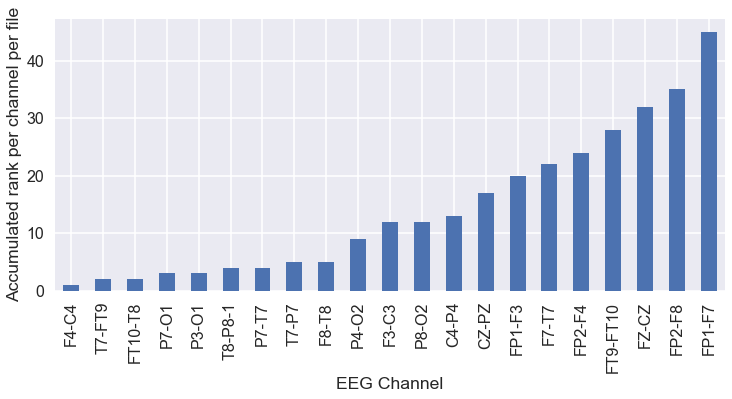

In [23]:
fig_by_file = plot_variance_by_file(variance_by_file)

plt.savefig("{}/variance_per_file.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)


The results obtained in the first, second and third scenarios were not consistent with those reported by the author, in any of them we found the channel FT9-FT10 as the one appearing most for the first $10$ patients. There is also another possible scenario, however, it is not reproducible, where the authors randomly sampled the dataset and evaluated the variance.

Given the associated uncertainty, we decided to repeat the choice of the channel $FT9-FT10$, although this is not the one with the most variance in the modeled scenarios.


In [24]:
variance_per_person = get_variance_by_person(PATH_CHBMIT, 
                                             range_= (1,11))

Reading the variance already calculated.


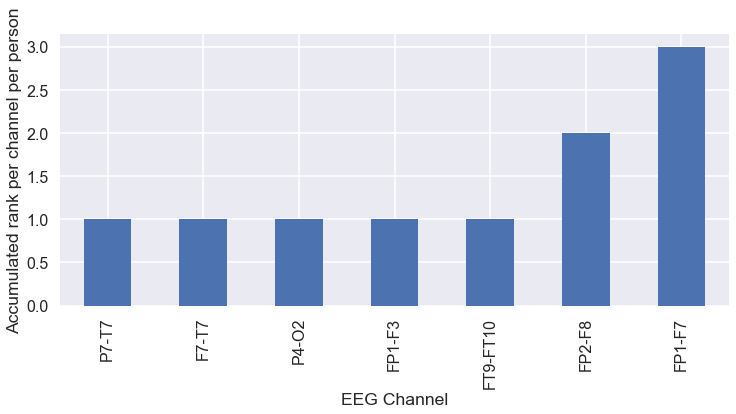

In [25]:
fig_by_person = plot_variance_by_person(variance_per_person)
plt.savefig("{}/variance_per_person.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

The results obtained in the second scenario were not consistent with those reported by the author.

Finally, as a final interpretation, we calculate the cumulative variance across all people and all records, thus, we did not perform a sampling process. In other words, we put all the files together and calculate the variance as if it were a single record. For this, we compute the variance, number of points and average per channel in each file and accumulate through the cumulative variance calculation algorithm. The result of this analysis approach can be seen in Figure below:

In [26]:
accumulate_var = get_variance_accumulated(PATH_CHBMIT, range_= (1,11))

Reading the variance already calculated.


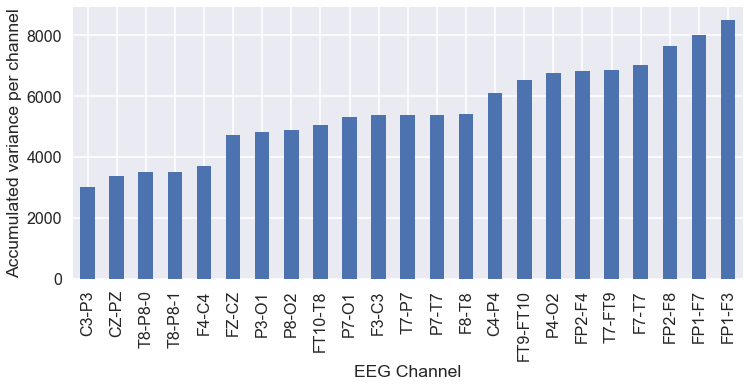

In [27]:
fig_accumulate = plot_variance_accumulate(accumulate_var)
plt.savefig("{}/variance_all.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

The results obtained in the first, second and third interpretations were not consistent with those reported by the author. There is still another possible scenario, however, not reproducible, where the authors randomly sampled the dataset and evaluated the variance.

However, given the associated uncertainty, we decided to repeat the choice of the channel `FT9-FT10`, although this is not the one with the most variance in the modeled scenarios.

---

There is still another possible scenario, however, not reproducible, being the possibility that the authors randomly sampled the dataset and in this they verified the variance.

## 8.2. Reproduction of the values reported by the original author.

The results obtained in our reproduction experiment, for the first dataset, are presented in Accuracy Tables 1 and 2 and the differences between results can be seen in Figures 2 and 3. We employed the same methodology as the one used in the original paper, performing a $5$-fold cross-validation for each classifier, and we show the mean values.

In the first column, we have the encoded hidden layer size* after the feature learning process. The remaining columns are the average values obtained in the classification using the latent space as input. For each table reproduced, we also present the original result and the difference between them.

*Denoted here as Dimension and is equivalent to the variable $m$ in the original paper.

In [28]:
reprod_table_2, reprod_2_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon,
                                                    name_type="mae",
                                                    metric="accuracy",
                                                    name_dataset="boon",
                                                    original=True,
                                                    proposed=True)
reprod_2_style

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.480000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.400000,0.560000
4,0.708000,0.600000,0.600000,0.688000,0.682000,0.600000,0.738000,0.560000,0.647000
8,0.764000,0.600000,0.600000,0.728000,0.756000,0.600000,0.710000,0.556000,0.664250
16,0.786000,0.600000,0.600000,0.762000,0.778000,0.586000,0.766000,0.588000,0.683250
32,0.794000,0.600000,0.598000,0.722000,0.812000,0.660000,0.806000,0.638000,0.703750
64,0.814000,0.602000,0.696000,0.722000,0.786000,0.718000,0.796000,0.650000,0.723000
128,0.780000,0.716000,0.754000,0.700000,0.786000,0.792000,0.782000,0.616000,0.740750


In [29]:
origin_table_2 = get_original_results(2, path_original)
origin_table_2.style.set_caption(
    "Original accuracy values, analysis of Table 2.")

,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.733360,0.666700,0.726680,0.750020,0.750020,0.690020,0.753340,0.519980,0.698765
4,0.763360,0.746680,0.780020,0.790020,0.793360,0.763360,0.786680,0.656660,0.760018
8,0.760000,0.813340,0.833360,0.823360,0.833340,0.823360,0.836680,0.679980,0.800427
16,0.866660,0.876660,0.893340,0.893340,0.856680,0.883340,0.886680,0.803320,0.870003
32,0.880020,0.930000,0.943320,0.939980,0.936660,0.963360,0.925340,0.933340,0.928750
64,0.839400,0.943340,0.920000,0.913320,0.896640,0.926660,0.926680,0.923340,0.910740
128,0.780000,0.936660,0.908660,0.866660,0.883340,0.946660,0.926640,0.920000,0.896077


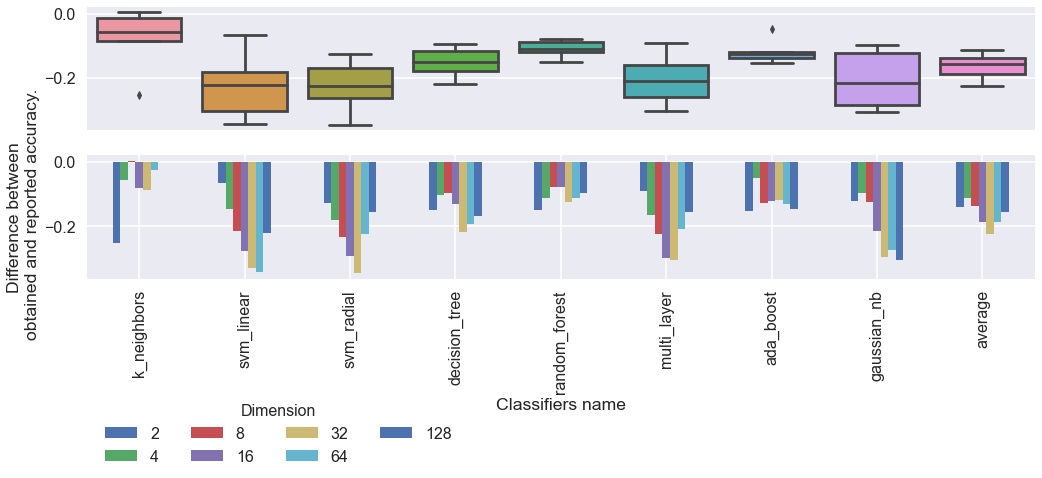

In [30]:
fig_diff_2 = boxplot_difference(reprod_table_2, origin_table_2)

plt.savefig("{}/table_2.pdf".format(path_figure),
            bbox_inches="tight",
            dpi=600)

> Table 2 and Figure 2: Classification Accuracy Results of AE-CDNN-MAE for Dataset 1<a name="table:accuracy-ae-l1-d1"></a>, Reproduced and Difference.
---

In [31]:
reprod_table_3, reprod_3_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_boon, 
                                                    name_type="maae",
                                                    metric="accuracy", 
                                                    name_dataset="boon",
                                                    original=True, 
                                                    proposed=True)
reprod_3_style

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.738000,0.600000,0.600000,0.694000,0.694000,0.600000,0.730000,0.450000,0.638250
4,0.738000,0.600000,0.600000,0.728000,0.724000,0.600000,0.736000,0.520000,0.655750
8,0.712000,0.600000,0.600000,0.694000,0.658000,0.600000,0.742000,0.562000,0.646000
16,0.818000,0.600000,0.600000,0.792000,0.790000,0.568000,0.792000,0.654000,0.701750
32,0.796000,0.600000,0.600000,0.724000,0.786000,0.602000,0.804000,0.644000,0.694500
64,0.812000,0.600000,0.600000,0.730000,0.804000,0.688000,0.786000,0.664000,0.710500
128,0.790000,0.616000,0.720000,0.726000,0.758000,0.750000,0.772000,0.620000,0.719000


In [32]:
origin_table_3 = get_original_results(3, path_original)
origin_table_3.style.set_caption(
    "Original accuracy values, analysis of Table 3.")

,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.600000,0.555000,0.600000,0.602500,0.607500,0.587500,0.602500,0.580000,0.591875
4,0.557500,0.545000,0.555000,0.547500,0.552500,0.540000,0.555000,0.557500,0.551250
8,0.805000,0.837500,0.830000,0.832500,0.867500,0.855000,0.852500,0.840000,0.840000
16,0.670000,0.725000,0.697500,0.725000,0.762500,0.750000,0.712500,0.750000,0.724063
32,0.722500,0.872500,0.857500,0.880000,0.872500,0.865000,0.870000,0.862500,0.850313
64,0.672500,0.902500,0.902500,0.867500,0.882500,0.895000,0.862500,0.840000,0.843125
128,0.597500,0.912500,0.855000,0.845000,0.920000,0.917500,0.882500,0.900000,0.853750


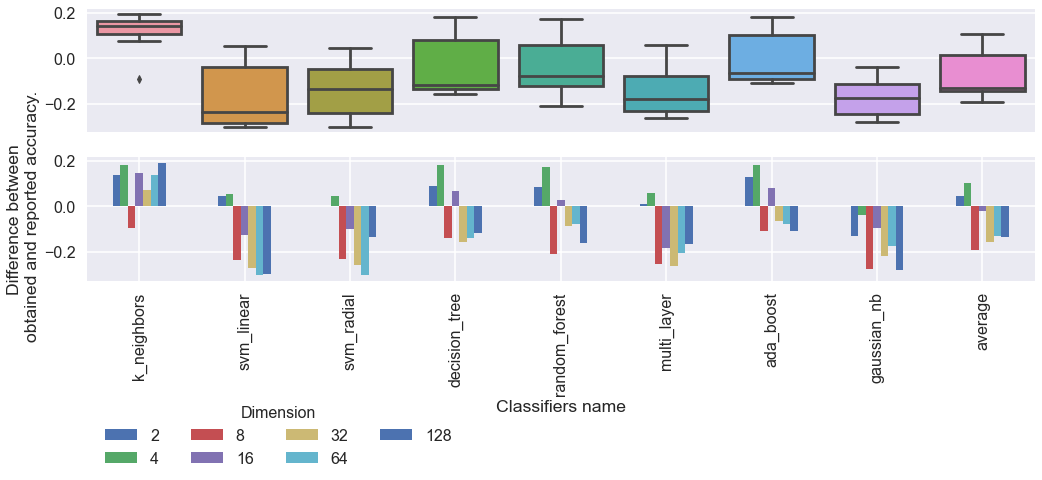

In [33]:
fig_diff_3 = boxplot_difference(reprod_table_3, origin_table_3)

plt.savefig("{}/table_3.pdf".format(path_figure), 
            bbox_inches="tight", 
            dpi=600)

> Table 3 and Figure 3: Classification Accuracy Results of AE-CDNN-L2 for Dataset 1<a name="table:accuracy-ae-l2-d1"></a>.

---

In [34]:
reprod_table_4, reprod_4_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_chbmit, 
                                                    name_type="mae",
                                                    metric="accuracy", 
                                                    name_dataset="chbmit",
                                                    original=True, 
                                                    proposed=True)
reprod_4_style

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.717500,0.502500,0.557500,0.740000,0.672500,0.452500,0.752500,0.770000,0.645625
4,0.770000,0.567500,0.687500,0.795000,0.752500,0.715000,0.792500,0.697500,0.722187
8,0.805000,0.605000,0.757500,0.810000,0.830000,0.765000,0.820000,0.780000,0.771563
16,0.795000,0.772500,0.860000,0.790000,0.845000,0.825000,0.820000,0.862500,0.821250
32,0.742500,0.830000,0.855000,0.832500,0.832500,0.850000,0.837500,0.862500,0.830313
64,0.765000,0.820000,0.840000,0.790000,0.837500,0.845000,0.837500,0.870000,0.825625
128,0.647500,0.820000,0.842500,0.727500,0.800000,0.827500,0.795000,0.797500,0.782187


In [35]:
origin_table_4 = get_original_results(4, path_original)
origin_table_4.style.set_caption(
    "Original accuracy values, analysis of Table 4.")

,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.600000,0.555000,0.600000,0.602500,0.607500,0.587500,0.602500,0.580000,0.591875
4,0.557500,0.545000,0.555000,0.547500,0.552500,0.540000,0.555000,0.557500,0.551250
8,0.805000,0.837500,0.830000,0.832500,0.867500,0.855000,0.852500,0.840000,0.840000
16,0.670000,0.725000,0.697500,0.725000,0.762500,0.750000,0.712500,0.750000,0.724063
32,0.722500,0.872500,0.857500,0.880000,0.872500,0.865000,0.870000,0.862500,0.850313
64,0.672500,0.902500,0.902500,0.867500,0.882500,0.895000,0.862500,0.840000,0.843125
128,0.597500,0.912500,0.855000,0.845000,0.920000,0.917500,0.882500,0.900000,0.853750


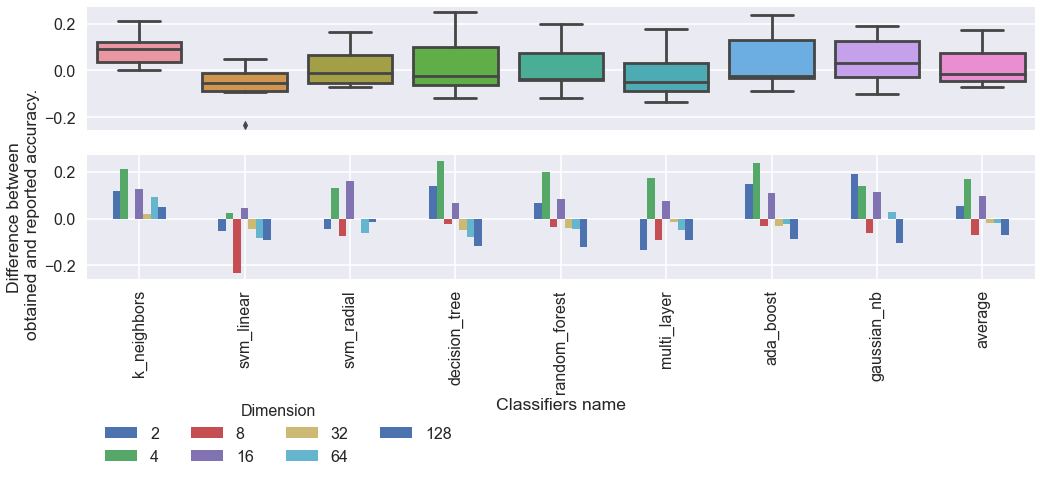

In [36]:
fig_diff_4 = boxplot_difference(reprod_table_4, origin_table_4)

plt.savefig("{}/table_4.pdf".format(path_figure), 
            bbox_inches="tight", 
            dpi=600)

> Table 4 and Figure 4: Classification Accuracy Results of AE-CDNN-MAE for Dataset 2<a name="table:accuracy-ae-l1-d2"></a>.
---

In [37]:
reprod_table_5, reprod_5_style = table_export_latex(path_save=path_table,
                                                    dataset=metrics_chbmit, 
                                                    name_type="maae",
                                                    metric="accuracy", 
                                                    name_dataset="chbmit",
                                                    original=True, 
                                                    proposed=True)
reprod_5_style

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.715000,0.502500,0.580000,0.712500,0.700000,0.542500,0.700000,0.757500,0.651250
4,0.815000,0.597500,0.752500,0.815000,0.817500,0.742500,0.805000,0.805000,0.768750
8,0.830000,0.597500,0.702500,0.760000,0.810000,0.727500,0.802500,0.772500,0.750312
16,0.835000,0.747500,0.837500,0.812500,0.850000,0.822500,0.817500,0.862500,0.823125
32,0.777500,0.767500,0.830000,0.770000,0.815000,0.815000,0.815000,0.850000,0.805000
64,0.787500,0.760000,0.847500,0.790000,0.832500,0.820000,0.830000,0.865000,0.816562
128,0.650000,0.810000,0.827500,0.760000,0.810000,0.807500,0.777500,0.830000,0.784062


In [38]:
origin_table_5 = get_original_results(5, path_original)
origin_table_5.style.set_caption(
    "Original accuracy values, analysis of Table 5.")

,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
2,0.552500,0.552500,0.560000,0.552500,0.552500,0.497500,0.555000,0.550000,0.546562
4,0.717500,0.730000,0.732500,0.700000,0.730000,0.730000,0.730000,0.725000,0.724375
8,0.890000,0.880000,0.885000,0.872500,0.887500,0.882500,0.885000,0.870000,0.881563
16,0.792500,0.820000,0.792500,0.797500,0.815000,0.817500,0.800000,0.772500,0.800937
32,0.827500,0.905000,0.850000,0.880000,0.907500,0.912500,0.900000,0.867500,0.881250
64,0.805000,0.887500,0.860000,0.882500,0.910000,0.730000,0.880000,0.882500,0.854688
128,0.682500,0.840000,0.840000,0.835000,0.897500,0.872500,0.867500,0.882500,0.845313


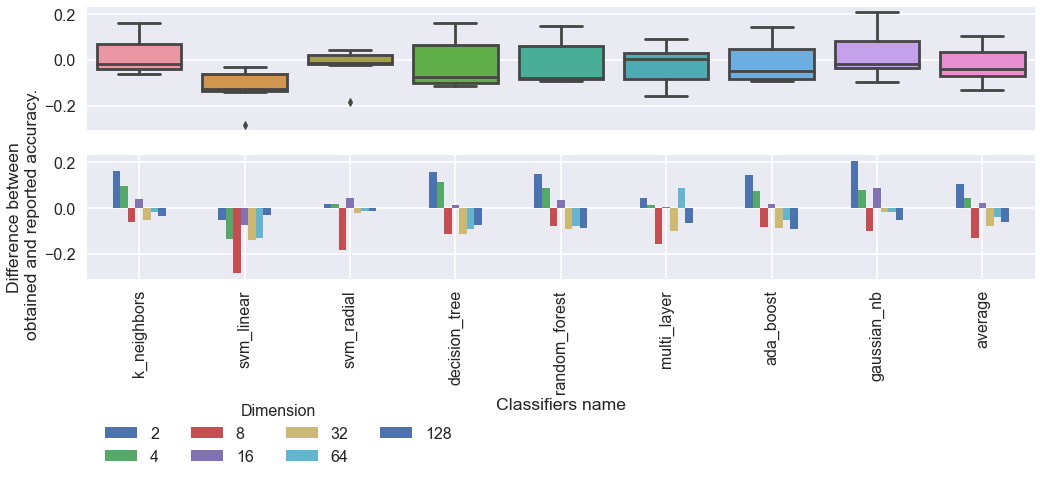

In [39]:
fig_box_5 = boxplot_difference(reprod_table_5, origin_table_5)

plt.savefig("{}/table_5.pdf".format(path_figure), 
            bbox_inches="tight", 
            dpi=600)

> Table 5 and Figure 5: Classification Accuracy Results of AE-CDNN-L2 for Dataset 2<a name="table:accuracy-ae-l2-d2"></a>.

---

We can perceive some differences when compared to the original results. In Table 1, we obtained the best average with a dimension equal to 64, while the original document obtained the best average when the dimension is equal to 128. The original document obtained higher accuracy values in most cases, even though when the dimension is equal to 2 or 4, our accuracy values are higher. The best precision in our article and in the original article was obtained by the random forest algorithm.

Note that Tables $3$ and $4$ in 1 have the exact same results, considering they contain results for different datasets and loss functions it seems to be an error in which the original authors used the same image in both cases by mistake. As our attempts to contact the original authors failed, we present our own results and comparisons. Therefore, the comparison of these two tables may be affected by this issue.

Considering Dataset 2 and Tables 3, 4 we obtained similar results when compared with the results obtained by the original authors [1]. In general, the original paper obtained a maximum accuracy greater than those obtained by our reproduction implementation, but the average and unique values per dimension are close in most cases considering both functions AE-CDNN-MAE and AE-CDNN-MAAE. However, for Dataset 1 the accuracy values obtained in this paper are significantly lower than the ones obtained by the original paper considering both AE-CDNN-MAE and AE-CDNN-MAAE, as shown in Figure 6. 


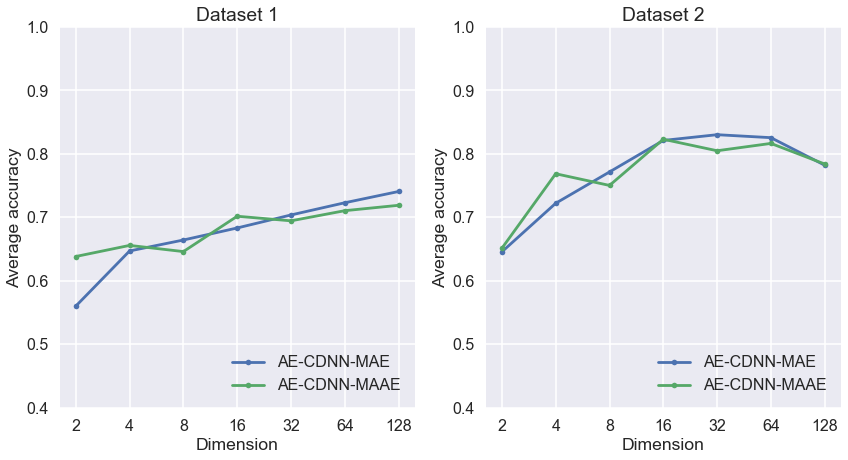

In [40]:
fig_avg_acc = plot_average_metric(metrics_boon["mae"], 
                                  metrics_boon["maae"],
                                  metrics_chbmit["mae"], 
                                  metrics_chbmit["maae"],
                                  names=["AE-CDNN-MAE", "AE-CDNN-MAAE"])

plt.savefig("{}/average-MAE-MAAE.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

> Figure 6: Average Accuracy Results of AE-CDNN-MAE and AE-CDNN-MAAE, with different dimension values in the two dataset <a name="fig:average-cdnn"></a>.

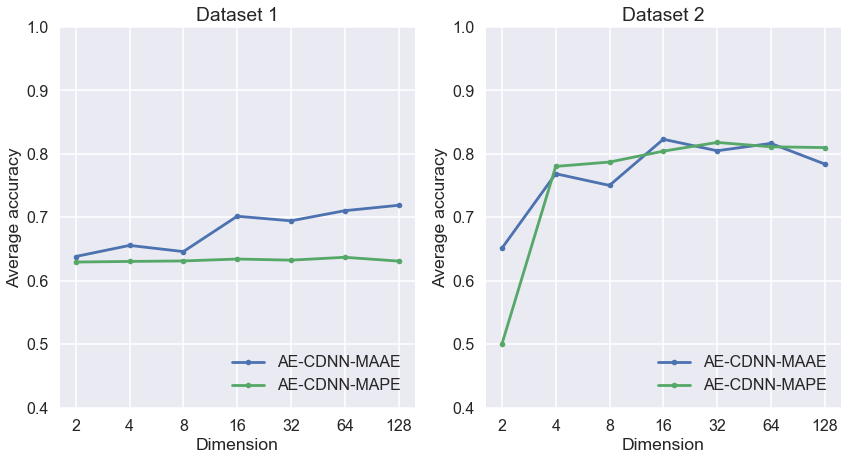

In [41]:
fig_avg_acc = plot_average_metric(metrics_boon["maae"], 
                                  metrics_boon["mape"],
                                  metrics_chbmit["maae"], 
                                  metrics_chbmit["mape"],
                                  ["AE-CDNN-MAAE", "AE-CDNN-MAPE"])

plt.savefig("{}/average-MAAE-MAPE.pdf".format(path_figure), 
            bbox_inches="tight", dpi=600)

> Figure 6: Average Accuracy Results of AE-CDNN-MAAE and AE-CDNN-MAPE in the two dataset <a name="fig:average-cdnn-mape"></a>.


When observing the values obtained in the classification, in the k-fold, we have that the accuracy values follow the proportion of the data, indicating the non-learning of the classification methods. We observed below the result for the accuracy inspection, for the cross validation, for $m = 2$. Analyzing the accuracy obtained by classifiers in Tables 3 and 4 we observe the values obtained by AE-CDNN-MAAE and AE-CDNN-MAE are close, however the function AE-CDNN-MAAE acquired smoothly better results and with less variation, in general. 

In [42]:
boon_mae_2 = table_classification_fold(metrics_boon["mae"], dimension=2)

boon_mae_2.to_latex("{}/acc-mae-boon-fold-2.tex".format(path_table),
                    caption="Accuracy in Classification, with loss MAE"\
                    ", on each fold cross-validation, for Dataset 1.",
                    label="table:acc-mae-boon-fold-2")

> Table 6: Accuracy in Classification, with loss `MAE`, on each fold cross-validation, for Dataset 1<a name="table:accuracy-ae-l1-d1-fold"></a>.


In [43]:
boon_maae_2 = table_classification_fold(metrics_boon["maae"], dimension=2)

boon_maae_2.to_latex("{}/acc-maae-boon-fold-2.tex".format(path_table),
                     caption="Accuracy in Classification, with loss MAAE"\
                     ", on each fold cross-validation, for Dataset 1.",
                     label="table:acc-maae-boon-fold-2")

> Table 7: Accuracy in Classification, with loss `MAAE`, on each fold cross-validation, for Dataset 1<a name="table:accuracy-ae-l2-d1-fold"></a>.


In the original paper we observe similar differences between the two functions, the results for AE-CDNN-MAAE are smoothly better for most classifiers, but considering gaussian\_nb, for example, the function AE-CDNN-MAAE acquired much better results comparing with AE-CDNN-MAE. Although the results in original paper also have few variations for the classifiers svm\_linear, svm\_radial and multi\_layer we had no variance in these classifers for function AE-CDNN-MAAE.

In the second dataset, in Tables below, when analyzing by fold we have that results are worse than those reported by the authors. However, the results is consistent with the hypothesis during the process, there was no feature learning. Also given the balance of this second dataset, we have that all methods do not present a better result than the random chance. 

In [44]:
chbmit_mae_2 = table_classification_fold(metrics_chbmit["mae"], dimension=2)

chbmit_mae_2.to_latex("{}/acc-mae-chbmit-fold-2.tex".format(path_table),
                     caption="Accuracy in Classification, with loss MAE"\
                     ", on each fold cross-validation, for Dataset 2.",
                     label="table:acc-mae-chbmit-fold-2")

chbmit_mae_2

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb
5-fold,,,,,,,,
1,0.7750,0.5000,0.7250,0.8250,0.7625,0.3250,0.8125,0.850
2,0.7125,0.5000,0.5375,0.7375,0.6875,0.4500,0.7750,0.775
3,0.7125,0.5125,0.5250,0.7125,0.6250,0.3875,0.7250,0.750
4,0.7000,0.5000,0.5000,0.7250,0.6500,0.4750,0.7500,0.775
5,0.6875,0.5000,0.5000,0.7000,0.6375,0.6250,0.7000,0.700


> Table 8: Accuracy in Classification, with loss `MAE`, on each fold cross-validation, for Dataset 2<a name="table:accuracy-ae-l1-d2-fold"></a>.


In [45]:
chbmit_maae_2 = table_classification_fold(metrics_chbmit["maae"], dimension=2)

chbmit_maae_2.to_latex("{}/acc-maae-chbmit-fold-2.tex".format(path_table),
                       caption="Accuracy in Classification, with loss MAAE"\
                       ", on each fold cross-validation, for Dataset 2.",
                       label="table:acc-maae-chbmit-fold-2")

chbmit_maae_2

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb
5-fold,,,,,,,,
1,0.7875,0.5125,0.7250,0.7750,0.7750,0.6250,0.7375,0.8750
2,0.6875,0.5000,0.5375,0.7250,0.7125,0.4875,0.6875,0.7375
3,0.7375,0.5000,0.5750,0.7000,0.7000,0.4125,0.7125,0.7125
4,0.6875,0.5000,0.5250,0.7000,0.6375,0.6375,0.6625,0.7500
5,0.6750,0.5000,0.5375,0.6625,0.6750,0.5500,0.7000,0.7125


> Table 9: Accuracy in Classification, with loss `MAAE`, on each fold cross-validation, for Dataset 2<a name="table:accuracy-ae-l2-d2-fold"></a>.



When analyzing the reduced values by class, specifically with $m = 4$ we have $3$ of the $4$ attributes are $0$, in the best scenario, indicating that there was no learning in Auto Encoder to distinguish the behavior by class. This bad representation of latent space occurs regardless of the loss function.

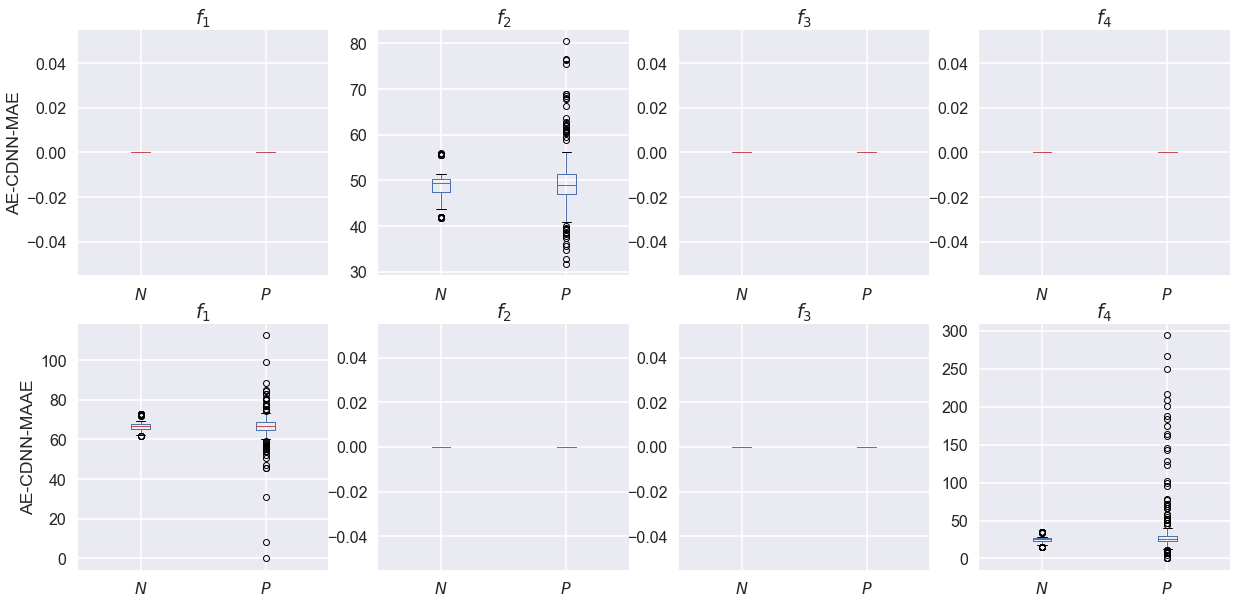

In [46]:
fig_feat_distri = plot_feature_distribution(PATH_BOON, 4,
                                            names=["AE-CDNN-MAE",
                                                   "AE-CDNN-MAAE"])

plt.savefig("{}/feature_distribution_4.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 8: Feature Distribution of AE-CDNN-MAE and AE-CDNN-MAAE, with $m=4$, in the first dataset. <a name="fig:feature-"></a>

---

When we analyze the behavior of the loss functions at the epoch in the first dataset, we have that these do not have a parallel with those reported by the original author. In addition, numerically in the second function MAAE the values also do not present an adequate dimension with that originally reported. Consequently, we also have an indication that in the MAAE function there was not an adequate generalization in the validation.

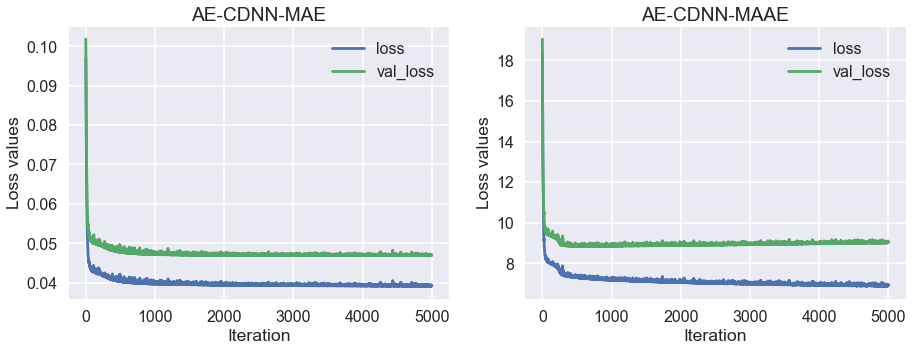

In [47]:
history_mae_4 = read_history_model(PATH_BOON, "mae", 4)
history_maae_4 = read_history_model(PATH_BOON, "maae", 4)

fig_change_loss = plot_change_loss(history_mae_4, history_maae_4,
                                  ["AE-CDNN-MAE", "AE-CDNN-MAAE"])

plt.savefig("{}/change_loss_mae_maae.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 9: Change of loss function of AE-CDNN-MAE and AE-CDNN-MAAE, in the first dataset, with $m=4$ <a name="fig:loss-change-4"></a>.

---

Even assuming that the author used the MAPE loss function, we still do not obtain an adequate result in loss at the epoch, as show the Figure:

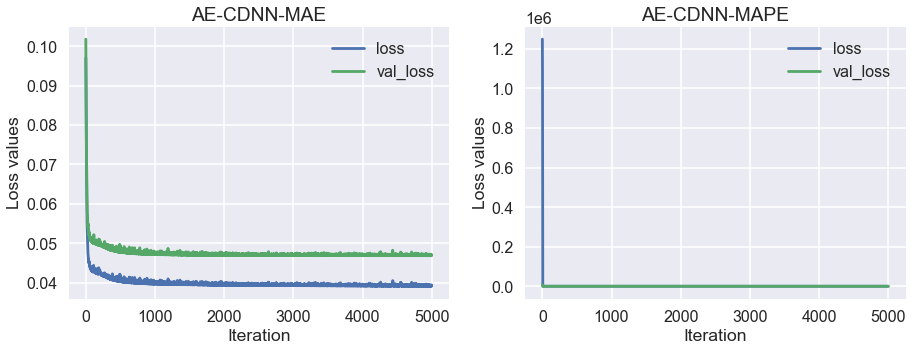

In [48]:
history_mape_4 = read_history_model(PATH_BOON, "mape", 4)

fig_change_loss = plot_change_loss(history_mae_4, history_mape_4,
                                   names=["AE-CDNN-MAE", "AE-CDNN-MAPE"])

plt.savefig("{}/change_loss_mae_mape.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 10: Change of loss function of AE-CDNN-MAE and AE-CDNN-MAPE, in the first dataset, with $m=4$ <a name="fig:loss-change-4"></a>.

---

These differences also occur in the establishment in the baseline methods, indicating that there is some cut in the training set that was not included in this modeling, given the lack of information in the article. In Baseline Figure we observe similar average accuracy between AE-CDNN-MAE, AE-CDNN-MAAE, PCA and SRP for both datasets. 

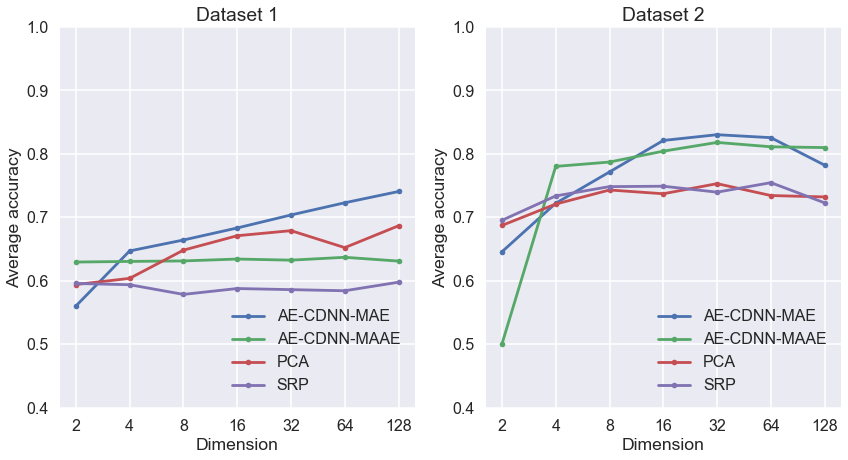

In [49]:
fig_avg_acc_base = plot_average_metric_baseline(metrics_boon["mae"], 
                                                metrics_boon["mape"],
                                                metrics_boon["pca"], 
                                                metrics_boon["srp"],
                                                metrics_chbmit["mae"], 
                                                metrics_chbmit["mape"],
                                                metrics_chbmit["pca"], 
                                                metrics_chbmit["srp"],
                                                name=["AE-CDNN-MAE",
                                                      "AE-CDNN-MAAE",
                                                      "PCA", "SRP"])


plt.savefig("{}/baseline_methods.pdf".format(path_figure),
            bbox_inches="tight", dpi=600)

> Figure 11: Comparison of accuracy for different loss functions (`AE-CDNN-MAE`, `AE-CDNN-MAAE`), and also with baseline (`PCA`, `SRP`) <a name="fig:baseline"></a>.

---

The same is observed in the original article, as well as a similar behavior, but the average accuracy obtained for Dataset 1 are significantly higher than those obtained by our reproduction, as shown in the Table:

In [50]:
metrics_boon_cv_10 = run_classification(path_dataset=PATH_BOON,
                                        name_type="mae",
                                        range_values=[16, 32],
                                        cross_values=10)

Perform classification on data reduced by : mae
Running with 16 dimensions
Running with 32 dimensions


In [51]:
acc_boon_10 = table_classification_dimension(metrics_boon_cv_10,
                                             metric="accuracy")


acc_boon_10.to_latex("{}/metrics_boon_cv_10.tex".format(path_table),
                     caption="Accuracy in Classification, "
                     "in the first dataset with $CV=10$.",
                     label="metrics_boon_cv_10")

acc_boon_10

name_classifier,k_neighbors,svm_linear,svm_radial,decision_tree,random_forest,multi_layer,ada_boost,gaussian_nb,average
Dimension,,,,,,,,,
16,0.790,0.6,0.600,0.746,0.786,0.586,0.760,0.584,0.6815
32,0.802,0.6,0.602,0.722,0.828,0.712,0.792,0.638,0.7120


When we analyze the result assuming a $10$-fold, we have an increase in the accuracy values for the first dataset, however, still below that reported by the author.


<!--bibtex 

@Article{WenZha:2018,
    author = {Wen, Tingxi and Zhang, Zhongnan},
    year = {2018},
    month = {05},
    pages = {1-1},
    title = {Deep Convolution Neural Network and Autoencoders-based Unsupervised Feature Learning of EEG Signals},
    volume = {PP},
    journal = {IEEE Access},
    doi = {10.1109/ACCESS.2018.2833746}
}

@Article{Shoeb,
 author = {Shoeb, Ali and Guttag, John},
 title = {Application of Machine Learning to Epileptic Seizure Detection},
 booktitle = {Proceedings of the 27th International Conference on International Conference on Machine Learning},
 series = {ICML'10},
 year = {2010},
 isbn = {978-1-60558-907-7},
 location = {Haifa, Israel},
 pages = {975--982},
 numpages = {8},
 url = {http://dl.acm.org/citation.cfm?id=3104322.3104446},
 acmid = {3104446},
 publisher = {Omnipress},
 address = {USA},
} 

@Article{tensorflow,
  title={Tensorflow: A system for large-scale machine learning},
  author={Abadi, Mart{\'\i}n and Barham, Paul and Chen, Jianmin and Chen, Zhifeng and Davis, Andy and Dean, Jeffrey and Devin, Matthieu and Ghemawat, Sanjay and Irving, Geoffrey and Isard, Michael and others},
  booktitle={12th $\{$USENIX$\}$ Symposium on Operating Systems Design and Implementation ($\{$OSDI$\}$ 16)},
  pages={265--283},
  year={2016}
}

@Article{how,
  title={How Complex is your classification problem? A survey on measuring classification complexity},
  author={Lorena, Ana C and Garcia, Lu{\'\i}s PF and Lehmann, Jens and Souto, Marcilio CP and Ho, Tin K},
  journal={arXiv preprint arXiv:1808.03591},
  year={2018}
}

@Article{andrzejak,
    author = {G. Andrzejak, Ralph and Lehnertz, Klaus and Mormann, Florian and Rieke, Christoph and David, Peter and Elger, Christian},
    year = {2002},
    month = {01},
    pages = {061907},
    title = {Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state},
    volume = {64},
    journal = {Physical review. E, Statistical, nonlinear, and soft matter physics},
    doi = {10.1103/PhysRevE.64.061907}
}

@Article{kamath2015analysis,
  title={Analysis of EEG dynamics in epileptic patients and healthy subjects using Hilbert transform scatter plots},
  author={Kamath, Chandrakar},
  journal={Open Access Library Journal},
  volume={2},
  number={1},
  pages={1},
  year={2015},
  publisher={Scientific Research Publishing}
}


@Article{chollet2018keras,
  title={Keras: The python deep learning library},
  author={Chollet, Fran{\c{c}}ois and others},
  journal={Astrophysics Source Code Library},
  year={2018}
}

@Article{benavoli2017time,
  title={Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis},
  author={Benavoli, Alessio and Corani, Giorgio and Dem{\v{s}}ar, Janez and Zaffalon, Marco},
  journal={The Journal of Machine Learning Research},
  volume={18},
  number={1},
  pages={2653--2688},
  year={2017},
  publisher={JMLR. org}
}

@Article{Fuente:2019,
  author = {la Fuente, Alfredo De and Aduviri, Robert},
  title = {{[Re] Variational Sparse Coding}},
  journal = {ReScience C},
  year = {2019},
  month = may,
  volume = {5},
  number = {2},
  pages = {{\#2}},
  doi = {10.5281/zenodo.3161734},
  url = {https://zenodo.org/record/3161734/files/Article.pdf},
  code_url = {https://github.com/Alfo5123/Variational-Sparse-Coding},
  code_doi = {10.5281/zenodo.2657330},
  data_url = {},
  data_doi = {},
  review_url = {https://github.com/reproducibility-challenge/iclr_2019/pull/146},
  type = {Replication},
  language = {Python},
  domain = {Machine Learning},
  keywords = {generative models, variational autoencoders, sparse coding}
}


@Article{saab2005system,
  title={A system to detect the onset of epileptic seizures in scalp EEG},
  author={Saab, ME and Gotman, Jean},
  journal={Clinical Neurophysiology},
  volume={116},
  number={2},
  pages={427--442},
  year={2005},
  publisher={Elsevier}
}


@Article{kuhlmann2009seizure,
  title={Seizure detection using seizure probability estimation: Comparison of features used to detect seizures},
  author={Kuhlmann, Levin and Burkitt, Anthony N and Cook, Mark J and Fuller, Karen and Grayden, David B and Seiderer, Linda and Mareels, Iven MY},
  journal={Annals of biomedical engineering},
  volume={37},
  number={10},
  pages={2129--2145},
  year={2009},
  publisher={Springer}
}



@Article{shoeb2004patient,
  title={Patient-specific seizure onset detection},
  author={Shoeb, Ali and Edwards, Herman and Connolly, Jack and Bourgeois, Blaise and Treves, S Ted and Guttag, John},
  journal={Epilepsy \& Behavior},
  volume={5},
  number={4},
  pages={483--498},
  year={2004},
  publisher={Elsevier}
}



@Article{shoeb2011machine,
  title={A machine-learning algorithm for detecting seizure termination in scalp EEG},
  author={Shoeb, Ali and Kharbouch, Alaa and Soegaard, Jacqueline and Schachter, Steven and Guttag, John},
  journal={Epilepsy \& Behavior},
  volume={22},
  pages={S36--S43},
  year={2011},
  publisher={Elsevier}
}


@Article{ullah2018automated,
  title={An automated system for epilepsy detection using EEG brain signals based on deep learning approach},
  author={Ullah, Ihsan and Hussain, Muhammad and Aboalsamh, Hatim and others},
  journal={Expert Systems with Applications},
  volume={107},
  pages={61--71},
  year={2018},
  publisher={Elsevier}
}

@Article{chua2011application,
  title={Application of higher order spectra to identify epileptic EEG},
  author={Chua, Kuang Chua and Chandran, Vinod and Acharya, U Rajendra and Lim, Choo Min},
  journal={Journal of medical systems},
  volume={35},
  number={6},
  pages={1563--1571},
  year={2011},
  publisher={Springer}
}

@Article{nicolaou2012detection,
  title={Detection of epileptic electroencephalogram based on permutation entropy and support vector machines},
  author={Nicolaou, Nicoletta and Georgiou, Julius},
  journal={Expert Systems with Applications},
  volume={39},
  number={1},
  pages={202--209},
  year={2012},
  publisher={Elsevier}
}


@Article{xun2016detecting,
  title={Detecting epileptic seizures with electroencephalogram via a context-learning model},
  author={Xun, Guangxu and Jia, Xiaowei and Zhang, Aidong},
  journal={BMC medical informatics and decision making},
  volume={16},
  number={2},
  pages={70},
  year={2016},
  publisher={BioMed Central}
}

@Article{acharya2018deep,
  title={Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals},
  author={Acharya, U Rajendra and Oh, Shu Lih and Hagiwara, Yuki and Tan, Jen Hong and Adeli, Hojjat},
  journal={Computers in biology and medicine},
  volume={100},
  pages={270--278},
  year={2018},
  publisher={Elsevier}
}


@Article{emami2019autoencoding,
  title={Autoencoding of long-term scalp electroencephalogram to detect epileptic seizure for diagnosis support system},
  author={Emami, Ali and Kunii, Naoto and Matsuo, Takeshi and Shinozaki, Takashi and Kawai, Kensuke and Takahashi, Hirokazu},
  journal={Computers in biology and medicine},
  year={2019},
  publisher={Elsevier}
}

@Article{hussein2018epileptic,
  title={Epileptic seizure detection: A deep learning approach},
  author={Hussein, Ramy and Palangi, Hamid and Ward, Rabab and Wang, Z Jane},
  journal={arXiv preprint arXiv:1803.09848},
  year={2018}
}

@Article{roy2019deep,
  title={Deep learning-based electroencephalography analysis: a systematic review},
  author={Roy, Yannick and Banville, Hubert and Albuquerque, Isabela and Gramfort, Alexandre and Falk, Tiago H and Faubert, Jocelyn},
  journal={Journal of neural engineering},
  year={2019},
  publisher={IOP Publishing}
}

@article{most_commum:2002,
author = {Reynolds, E. H.},
title = {The ILAE/IBE/WHO Epilepsy Global Campaign History},
journal = {Epilepsia},
volume = {43},
number = {s6},
pages = {9-11},
doi = {10.1046/j.1528-1157.43.s.6.5.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1046/j.1528-1157.43.s.6.5.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1046/j.1528-1157.43.s.6.5.x},
year = {2002}
}

@article{global-epilepsy:2019,
title = "Global, regional, and national burden of epilepsy, 1990–2016: a systematic analysis for the Global Burden of Disease Study 2016",
journal = "The Lancet Neurology",
volume = "18",
number = "4",
pages = "357 - 375",
year = "2019",
issn = "1474-4422",
doi = "https://doi.org/10.1016/S1474-4422(18)30454-X",
url = "http://www.sciencedirect.com/science/article/pii/S147444221830454X",
author = "Ettore Beghi et. al",
}

@article{Epilepsia:2010,
author = {Ngugi, Anthony K. and Bottomley, Christian and Kleinschmidt, Immo and Sander, Josemir W. and Newton, Charles R.},
title = {Estimation of the burden of active and life-time epilepsy: A meta-analytic approach},
journal = {Epilepsia},
volume = {51},
number = {5},
pages = {883-890},
keywords = {Epilepsy, Prevalence, Burden, Meta-analysis},
doi = {10.1111/j.1528-1167.2009.02481.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1528-1167.2009.02481.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1528-1167.2009.02481.x},
year = {2010}
}


@article{stafstrom2015seizures,
  title={Seizures and epilepsy: an overview for neuroscientists},
  author={Stafstrom, Carl E and Carmant, Lionel},
  journal={Cold Spring Harbor perspectives in medicine},
  volume={5},
  number={6},
  pages={a022426},
  year={2015},
  publisher={Cold Spring Harbor Laboratory Press}
}

@article{thomas2011confronting,
  title={Confronting the stigma of epilepsy},
  author={Thomas, Sanjeev V and Nair, Aparna},
  journal={Annals of Indian Academy of Neurology},
  volume={14},
  number={3},
  pages={158},
  year={2011},
  publisher={Wolters Kluwer--Medknow Publications}
}


@article{mollaouglu2013injuries,
  title={Injuries in patients with epilepsy and some factors associated with injury},
  author={MOLLAO{\u{G}}LU, Mukadder and BOLAYIR, Ertu{\u{g}}rul},
  journal={N{\"o}ro Psikiyatri Ar{\c{s}}ivi},
  volume={50},
  number={3},
  pages={269},
  year={2013},
  publisher={Turkish Neuropsychiatric Society}
}

@book{niedermeyer2005electroencephalography,
  title={Electroencephalography: basic principles, clinical applications, and related fields},
  author={Niedermeyer, Ernst and da Silva, FH Lopes},
  year={2005},
  publisher={Lippincott Williams \& Wilkins}
}

@article{puce2017review,
  title={A review of issues related to data acquisition and analysis in EEG/MEG studies},
  author={Puce, Aina and H{\"a}m{\"a}l{\"a}inen, Matti S},
  journal={Brain sciences},
  volume={7},
  number={6},
  pages={58},
  year={2017},
  publisher={Multidisciplinary Digital Publishing Institute}
}

@article{craik2019deep,
  title={Deep learning for electroencephalogram (EEG) classification tasks: a review},
  author={Craik, Alexander and He, Yongtian and Contreras-Vidal, Jose L},
  journal={Journal of neural engineering},
  volume={16},
  number={3},
  pages={031001},
  year={2019},
  publisher={IOP Publishing}
}


@article{schauwecker2012effects,
  title={The effects of glycemic control on seizures and seizure-induced excitotoxic cell death},
  author={Schauwecker, Paula Elyse},
  journal={BMC neuroscience},
  volume={13},
  number={1},
  pages={94},
  year={2012},
  publisher={BioMed Central}
}

-->


# References

1. T. Wen and Z. Zhang. “Deep Convolution Neural Network and Autoencoders-based Unsupervised Feature Learning of EEG Signals.” In: IEEE Access PP (May 2018), pp. 1–1.
2. F. Chollet et al. “Keras: The python deep learning library.” In: Astrophysics Source Code Library (2018).
3. M. Abadi, P. Barham, J. Chen, Z. Chen, A. Davis, J. Dean, M. Devin, S. Ghemawat, G. Irving, M. Isard, et al. “Tensorflow: A system for large-scale machine learning.” In: (2016), pp. 265–283.
4. A. D. la Fuente and R. Aduviri. “[Re] Variational Sparse Coding.” Python. In: ReScience C 5.2 (May 2019), #2.
5. A. Shoeb and J. Guttag. “Application of Machine Learning to Epileptic Seizure Detection.” In: ICML’10 (2010), pp. 975–982.
6. A. Emami, N. Kunii, T. Matsuo, T. Shinozaki, K. Kawai, and H. Takahashi. “Autoencoding of long-term scalp electroencephalogram to detect epileptic seizure for diagnosis support system.” In: Computers in biology and medicine (2019).
7. R. G. Andrzejak, K. Lehnertz, F. Mormann, C. Rieke, P. David, and C. Elger. “Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state.” In: Physical review. E, Statistical, nonlinear, and soft matter physics 64 (Jan. 2002), p. 061907.
8. C. Kamath. “Analysis of EEG dynamics in epileptic patients and healthy subjects using Hilbert transform scatter plots.” In: Open Access Library Journal 2.1 (2015), p. 1.
9. A. H. Shoeb. “Application of machine learning to epileptic seizure onset detection and treatment.” PhD thesis. Massachusetts Institute of Technology, 2009.

